In [1]:
# ------ Import module ------
import pandas as pd
import numpy as np
import re

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

In [2]:
# ------ Define functions ------
def run_kmeans(n_clusters_f, init_f, df_f):
    # Complete this function
    # This function should at least take a dataframe as an argument. I have suggested additional arguments you may
    # want to provide, but these can be changed as you need to fit your solution.
    # The output of this function should be the input data frame will the model object KMeans and a data summary. The
    # function will need to add an additional column to the input dataframe called 'predict_cluster_kmeans'
    # that contains the cluster labels assigned by the algorithm.
    k_means_model_f = KMeans(n_clusters=n_clusters_f, init=init_f)
    k_means_model_f.fit(df_f)
    df_f['predict_cluster_kmeans'] = k_means_model_f.labels_

    # summarize cluster attributes
    #k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(attribute_summary_method_dict)
    k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(np.mean)
    return k_means_model_f, k_means_model_f_summary


def get_hour(timestamp):
    return int(timestamp.split()[1].split(':')[0])

In [3]:
# ------ Import data ------
df_subscribers = pd.read_csv('subscribers.csv')
df_subscribers.head(3)

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True


In [4]:
df_subscribers.shape

(227628, 31)

In [5]:
df_subscribers.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [6]:
# ------ Engineer features -----

In [7]:
corr_df = df_subscribers.drop(columns=['Unnamed: 0', 'subid', 
                           'account_creation_date', 'trial_end_date', 
                           'last_payment', 'next_payment', 'cancel_date'])

In [8]:
corr_df = pd.get_dummies(corr_df)
corr_df.columns

Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'months_per_bill_period',
       'monthly_price', 'discount_price', 'initial_credit_card_declined',
       'join_fee', 'num_trial_days', 'current_sub_TF', 'payment_period',
       'trial_completed', 'package_type_base', 'package_type_economy',
       'package_type_enhanced', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_False', 'male_TF_True', 'country_UAE',
       'attribution_technical_affiliate', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_org

In [9]:
corr_df = corr_df.drop(columns=['male_TF_False'])

In [10]:
corr_df['age'] = corr_df[corr_df['age']<100]['age']

In [11]:
corr_df = corr_df.dropna(subset=['num_weekly_services_utilized', 'weekly_consumption_hour', 
                                 'num_ideal_streaming_services', 'age'])

In [12]:
corr_df.isnull().sum()

num_weekly_services_utilized     0
weekly_consumption_hour          0
num_ideal_streaming_services     0
age                              0
months_per_bill_period           0
                                ..
payment_type_CBD                 0
payment_type_Najim               0
payment_type_Paypal              0
payment_type_RAKBANK             0
payment_type_Standard Charter    0
Length: 99, dtype: int64

In [13]:
corr_df.shape

(114922, 99)

In [14]:
# ------ RUN CLUSTERING -----

In [15]:
# --- set parameters
n_clusters = 3
init_point_selection_method = 'k-means++'

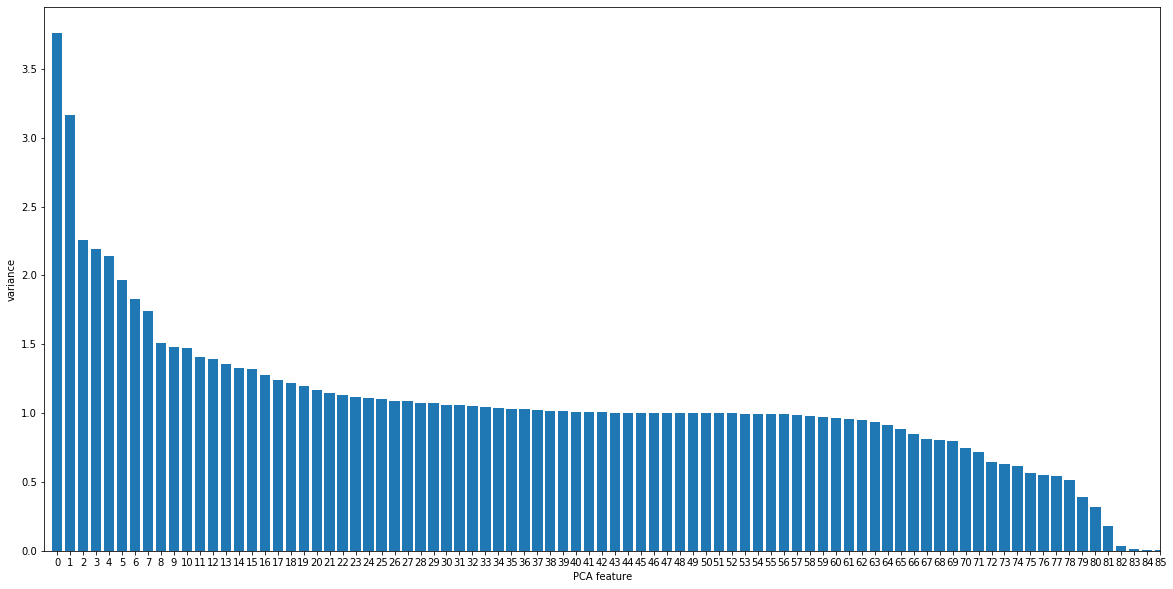

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(corr_df)

features = range(pca.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.xlim(-1,85)
plt.show()
#plt.savefig('pca.png')

In [17]:
corr_target = corr_df.corr()[['current_sub_TF']].sort_values('current_sub_TF', ascending=False)

In [18]:
salient_num_features = corr_target.loc[corr_target['current_sub_TF'] > 0.1, :]
salient_num_features

,current_sub_TF
current_sub_TF,1.000000
payment_period,0.746008
trial_completed,0.402398
intended_use_access to exclusive content,0.369019
preferred_genre_comedy,0.352438
num_weekly_services_utilized,0.291123
attribution_survey_referral,0.244300
package_type_enhanced,0.206006
intended_use_supplement OTT,0.173845
weekly_consumption_hour,0.158542


In [19]:
# --- select data
# specify list of attributes on which to base clusters
cols_for_clustering_full = corr_df.columns
df_cluster = corr_df.reindex(columns=cols_for_clustering_full)
# df_cluster = df.loc[:, cols_for_clustering]

In [20]:
# --- split to test and train
df_cluster_train, df_cluster_test, _, _, = train_test_split(
    df_cluster, [1]*df_cluster.shape[0], test_size=0.33)   # ignoring y values for unsupervised

In [21]:
# --- fit model
#attribute_summary_method_dict = {'burger': np.mean, 'fries': np.mean, 'salad': np.mean, 'shake': np.mean, 'hour': np.mean, 'store_1': sum,
#                                 'store_4': sum, 'store_6': sum, 'store_3': sum, 'store_9': sum, 'store_2': sum, 'store_8': sum, 'store_5': sum, 'store_7': sum}
#col_output_order = ['burger', 'fries', 'salad', 'shake', 'hour', 'store_1', 'store_2', 'store_3', 'store_4',
#                    'store_5', 'store_6', 'store_7', 'store_8', 'store_9']  # specify order of output columns for easy of readability


In [22]:
# training data
train_model, train_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_train.reindex())
# testing data
test_model, test_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_test.reindex())
# all data
model, model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster)

In [23]:
# --- run for various number of clusters

In [24]:
# add the code to run the clustering algorithm for various numbers of clusters
ks = range(1, 16)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_cluster)
    inertias.append(model.inertia_)

In [25]:
# --- draw elbow plot

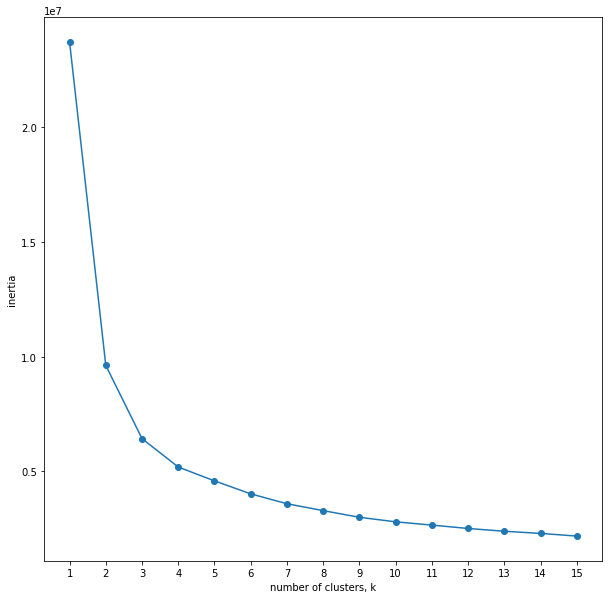

In [29]:
# create an elbow plot for your numbers of clusters in previous step
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [27]:
# --- output tagged data for examination ----
#store_col_names = ['store_1', 'store_2', 'store_3', 'store_4',
#                   'store_5', 'store_6', 'store_7', 'store_8', 'store_9']
#df_cluster['store'] = None
#for t_col in store_col_names:
#    df_cluster.loc[df_cluster[t_col] == 1, 'store'] = t_col.split('_')[1]

df_cluster.to_csv('clustering_output.csv')